# Data Visualization with Python Matplotlib for Beginner - Part 1

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [6]:
print('Ukuran dataset: %d baris dan %d kolom\n' %dataset.shape)
print('Lima data teratas:\n')
print(dataset.head())


Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


Aku dan teman-teman di ruangan rapat sibuk menyimak penjelasan ini:

order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer

order_date : tanggal terjadinya transaksi

customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali

city : kota tempat toko terjadinya transaksi

province : provinsi (berdasarkan city)

product_id : ID dari suatu product yang dibeli

brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama

quantity : Kuantitas / banyaknya product yang dibeli

item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

In [7]:
dataset.dtypes

order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
dtype: object

In [8]:
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())
dataset.dtypes

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
order_month    object
dtype: object

In [9]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' %dataset.shape)
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


In [10]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


In [11]:
dataset.groupby(['order_month','brand']).sum().unstack()

order_id                                                         \
brand          BRAND_A    BRAND_B    BRAND_C    BRAND_H    BRAND_J    BRAND_L   
order_month                                                                     
2019-07       70278255   87008788   96998272   35095026   70232670   78600014   
2019-08       70675581   77424916  100958238   42053983   89201171   94217804   
2019-09       84620033   50795070   71085474   32155966   77880418   89674388   
2019-10      117527487  112370892  173776398  117551157  103906804  109030843   
2019-11      166571941  118491105  190523568  152800241   77264802   99628657   
2019-12      220106563  140503737  282498421  166381899  150771660  166247403   

                                                         ...        gmv  \
brand          BRAND_P    BRAND_R    BRAND_S    BRAND_W  ...    BRAND_A   
order_month                                              ...              
2019-07      117054160  127083619  198969608   78602315  ...  326713000   
2019-08      151416234  127862500  222127425   57213937  ...  357401000   
2019-09      108320782  115095812  175993259   65986266  ...  258873000   
2019-10      214579542  175514212  301568091  115881590  ...  548614000   
2019-11      233500111  183701213  324481869  144236628  ...  527527000   
2019-12      310202759  341442332  464507395  195817214  ...  669029000   

                                                                    \
brand          BRAND_B    BRAND_C    BRAND_H    BRAND_J    BRAND_L   
order_month                                                          
2019-07      260605000  272511000   89936000  348151000  244413000   
2019-08      293799000  380110000  160446000  645394000  402161000   
2019-09      217258000  288637000  168769000  430580000  237654000   
2019-10      350125000  651095000  396724000  709920000  332522000   
2019-11      571389000  522863000  428063000  307951000  468261000   
2019-12      401298000  756636000  664723000  798862000  556561000   

                                                            
brand           BRAND_P     BRAND_R     BRAND_S    BRAND_W  
order_month                                                 
2019-07       394808000   473672000   816882000  296350000  
2019-08       618439000   427185000   744362000  423626000  
2019-09       530957000   451353000   943807000  419114000  
2019-10       740415000  1207866000  1102456000  680200000  
2019-11       837394000   748512000   802054000  968215000  
2019-12      1008256000  1358124000  1289261000  645485000  

[6 rows x 50 columns]

# PLOT

In [12]:
import matplotlib.pyplot as plt 

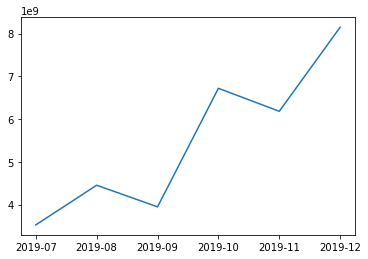

In [13]:
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

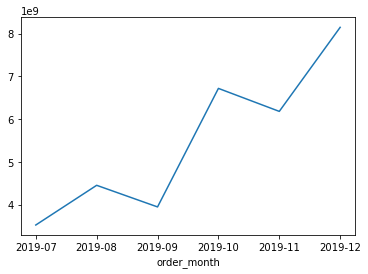

In [14]:
dataset.groupby('order_month')['gmv'].sum().plot()
plt.show()

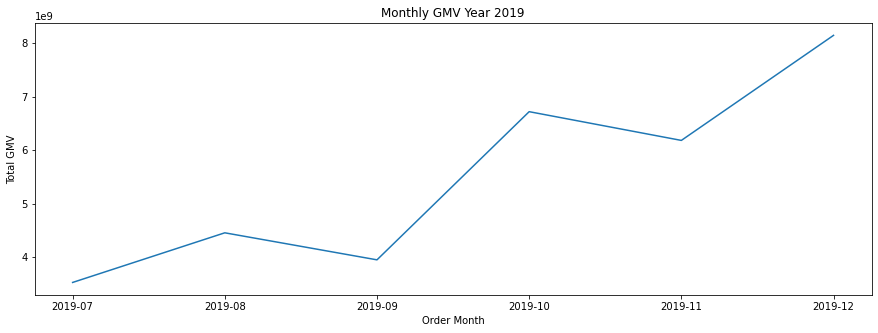

In [15]:
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

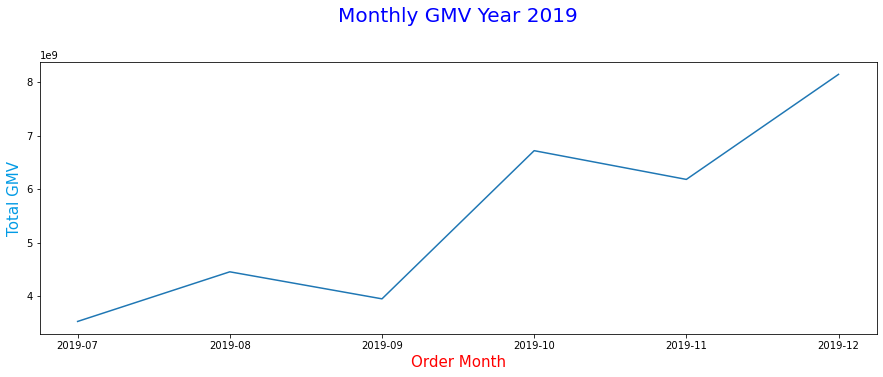

In [16]:
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15, color='red')
plt.ylabel('Total GMV', fontsize = 15, color='#039be5')
plt.show()

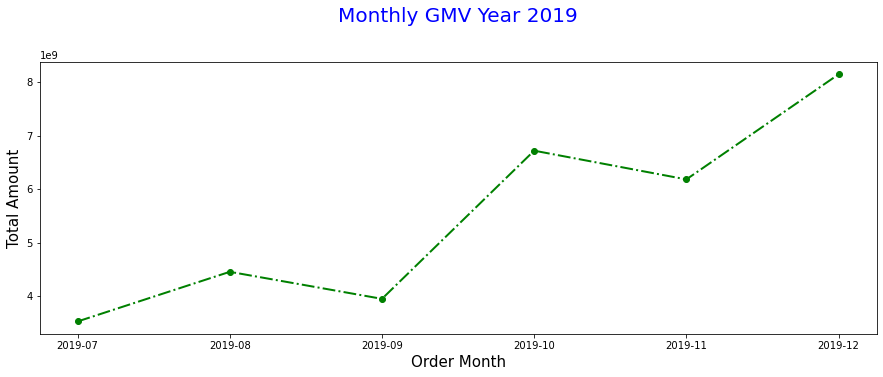

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

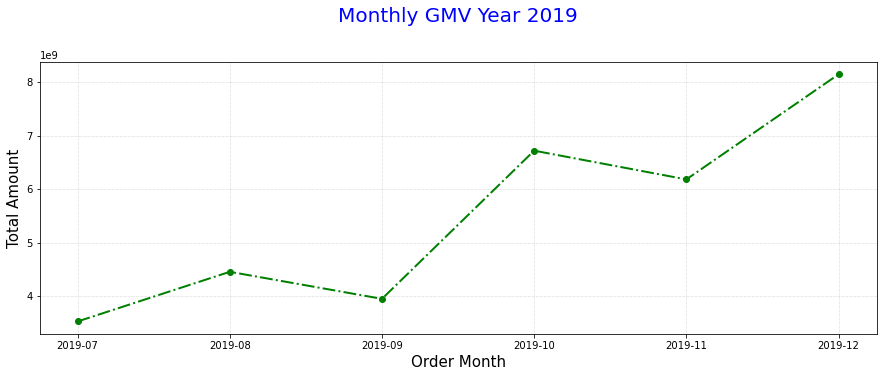

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle = ':', linewidth=0.5)
plt.show()

<ipython-input-19-4d30e1d09b7d>:29: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig('monthly_gmv.jpg', quality = 95,facecolor='red')


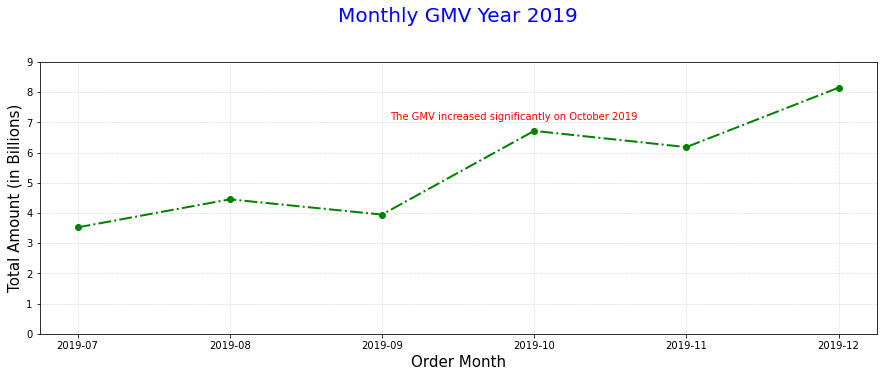

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))

#KOMPONEN PLOT
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

#KOMPONEN JUDUL
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')

#KOMPONEN LABEL X AXIS
plt.xlabel('Order Month', fontsize=15)

#KOMPONEN LABEL Y AXIS 
plt.ylabel('Total Amount (in Billions)', fontsize=15)

#KOMPONEN GRID
plt.grid(color='darkgray', linestyle = ':', linewidth=0.5)

plt.ylim(ymin=0)

#KOMPONEN X,Y TICKS
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#KOMPONEN TEXT
plt.text(0.45,0.72,'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')

#SAVE
plt.savefig('monthly_gmv.jpg', quality = 95,facecolor='red')
plt.show()

#pilihan save
plt.gcf().canvas.get_supported_filetypes()

Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:

dpi: Resolusi gambar (dots per inch). 
quality: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
facecolor: Memberikan warna bagian depan figure, di luar area plot 
edgecolor: Memberikan warna pinggiran gambar
transparent: Jika nilainya True, maka gambarnya jadi transparan (jika filenya png)
 

# MINI PROJECT

Dengan menggunakan dataset yang sama ('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

Ukuran figure adalah 10x5

Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019

Sumbu-y adalah jumlah unique customers di tiap tanggal

Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

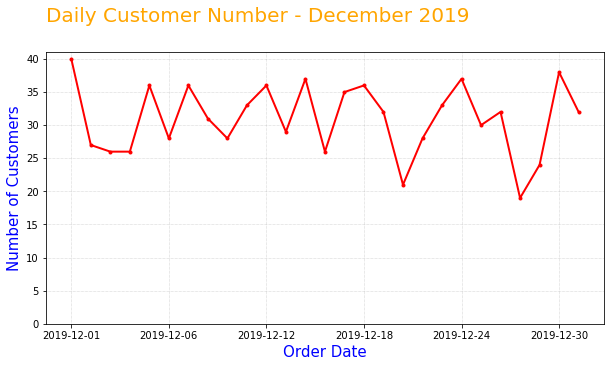

In [20]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Customer Number - December 2019', color='orange', fontsize=20, pad=30, loc='left')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

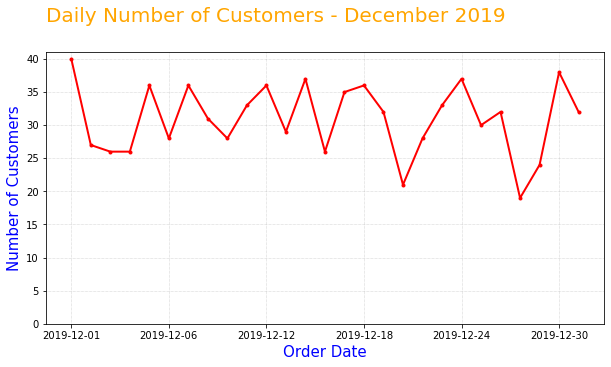

In [21]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

# Multiline Chart

Beberapa parameter yang bisa ditambahkan untuk legend:

loc: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
'center': legend diletakkan di tengah-tengah axes
'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik

bbox_to_anchor: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.

shadow: jika diisi True, maka kotak legend akan memiliki bayangan.

ncol: jumlah kolom dari isi legend, defaultnya adalah 1

fontsize: ukuran huruf pada legend

title: memberikan judul pada legend

title_fontsize: ukuran huruf pada judul legend

In [22]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

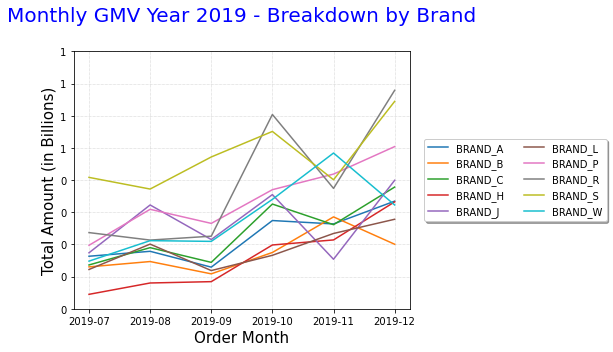

In [23]:
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

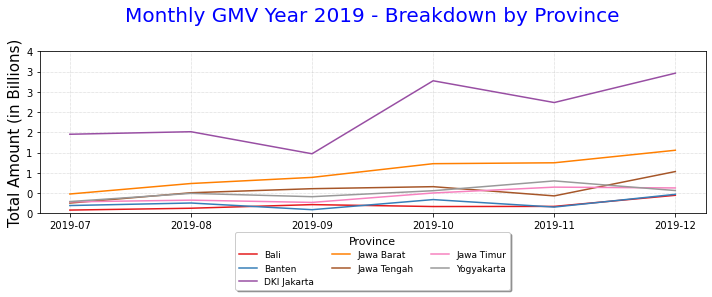

In [24]:
import matplotlib.pyplot as plt
plt.clf()
dataset.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title ='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [25]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')
dataset.head()

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta


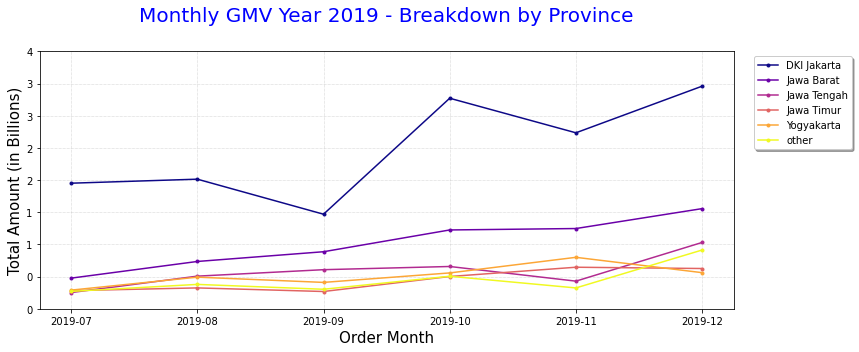

In [26]:
# Plot multi-line chartnya
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker = '.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

# Membuat Anotasi

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:

xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)

arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:

    arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
    connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
    color: menentukan warna dari panah

In [30]:
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack()

province_top,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta,other
order_month,,,,,,
2019-07,1951871000,476533000,252429000,282076000,290139000,270993000
2019-08,2014393000,735536000,507441000,324629000,491769000,379155000
2019-09,1469887000,886835000,607802000,268764000,410184000,303530000
2019-10,3272151000,1225234000,657536000,501911000,557501000,505604000
2019-11,2734964000,1247305000,429731000,646017000,799950000,324262000
2019-12,3459497000,1556706000,1030945000,626089000,561698000,913300000


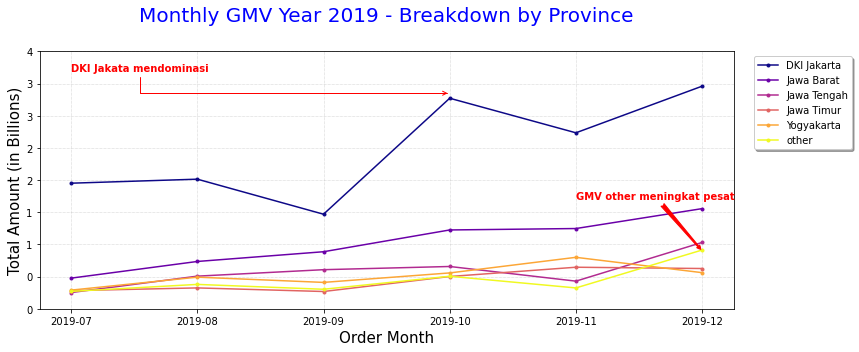

In [34]:
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker = '.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('GMV other meningkat pesat', xy=(5,900000000), xytext=(4,1700000000), weight='bold', color='red',
                            arrowprops = dict(arrowstyle= 'fancy',
                                            connectionstyle = 'arc3',
                                            color = 'red'))
plt.annotate('DKI Jakata mendominasi',xy=(3,3350000000), xytext=(0,3700000000), weight='bold', color='red',
                            arrowprops=dict(arrowstyle = '->',
                                            connectionstyle = 'angle',
                                            color = 'red'))
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

# Pie & Bar Chart

In [36]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] =='2019-10')]
print(dataset_dki_q4.head())

    order_id  order_date  customer_id             city     province  \
0    1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta   
1    1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta   
4    1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta   
13   1705093  2019-10-21        16999    Jakarta Utara  DKI Jakarta   
32   1705585  2019-10-22        13979    Jakarta Pusat  DKI Jakarta   

   product_id    brand  quantity  item_price order_month      gmv province_top  
0       P1910  BRAND_J        10      740000     2019-10  7400000  DKI Jakarta  
1       P2934  BRAND_R         2      604000     2019-10  1208000  DKI Jakarta  
4       P2968  BRAND_R         2     4475000     2019-10  8950000  DKI Jakarta  
13      P2521  BRAND_P         4     1745000     2019-10  6980000  DKI Jakarta  
32      P3592  BRAND_S         3     1745000     2019-10  5235000  DKI Jakarta  
